In [1]:
import yfinance as yf
import numpy as np

In [2]:
df = yf.download('BTC-USD',start='2016-10-10')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-10,616.822021,621.317993,616.197021,618.994019,618.994019,67481104
2016-10-11,619.237976,642.080017,618.500000,641.072021,641.072021,103590000
2016-10-12,640.870972,641.336975,635.965027,636.192017,636.192017,92370200
2016-10-13,636.030029,638.833008,635.028992,636.786011,636.786011,61620700
2016-10-14,637.007996,641.284973,637.007996,640.377991,640.377991,58144600
...,...,...,...,...,...,...
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789
2023-11-08,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918
2023-11-09,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382


In [4]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [5]:
def lagit(df, lags):
    names = []
    for i in range(1,lags +1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [6]:
lagnames =  lagit(df,5)

In [7]:
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2016-10-10,616.822021,621.317993,616.197021,618.994019,618.994019,67481104,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-11,619.237976,642.080017,618.500000,641.072021,641.072021,103590000,0.035046,NaN,NaN,NaN,NaN,NaN
2016-10-12,640.870972,641.336975,635.965027,636.192017,636.192017,92370200,-0.007641,0.035046,NaN,NaN,NaN,NaN
2016-10-13,636.030029,638.833008,635.028992,636.786011,636.786011,61620700,0.000933,-0.007641,0.035046,NaN,NaN,NaN
2016-10-14,637.007996,641.284973,637.007996,640.377991,640.377991,58144600,0.005625,0.000933,-0.007641,0.035046,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789,0.011526,-0.000342,-0.000937,0.010023,-0.005911,-0.014182
2023-11-08,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918,0.005956,0.011526,-0.000342,-0.000937,0.010023,-0.005911
2023-11-09,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382,0.028692,0.005956,0.011526,-0.000342,-0.000937,0.010023


In [9]:
df.dropna(inplace=True)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(df[lagnames], df['returns'])

LinearRegression()

In [13]:
df['prediction_LR'] = model.predict(df[lagnames])

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
Date,,,,,,,,,,,,,
2016-10-16,639.083008,642.898010,638.901001,641.630981,641.630981,40298100,0.004663,-0.002708,0.005625,0.000933,-0.007641,0.035046,0.002543
2016-10-17,641.817993,642.328003,638.663025,639.192993,639.192993,58063600,-0.003807,0.004663,-0.002708,0.005625,0.000933,-0.007641,0.001142
2016-10-18,639.411011,640.736023,635.995972,637.960022,637.960022,65546700,-0.001931,-0.003807,0.004663,-0.002708,0.005625,0.000933,0.001803
2016-10-19,638.133972,638.874023,628.013000,630.520020,630.520020,69381696,-0.011731,-0.001931,-0.003807,0.004663,-0.002708,0.005625,0.001542
2016-10-20,630.663025,631.916992,628.257996,630.856995,630.856995,56957300,0.000534,-0.011731,-0.001931,-0.003807,0.004663,-0.002708,0.001649
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789,0.011526,-0.000342,-0.000937,0.010023,-0.005911,-0.014182,0.001104
2023-11-08,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918,0.005956,0.011526,-0.000342,-0.000937,0.010023,-0.005911,0.001169
2023-11-09,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382,0.028692,0.005956,0.011526,-0.000342,-0.000937,0.010023,0.001984


In [15]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [16]:
df['strat_LR'] = df['direction_LR'] * df['returns']

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2016-10-16,639.083008,642.898010,638.901001,641.630981,641.630981,40298100,0.004663,-0.002708,0.005625,0.000933,-0.007641,0.035046,0.002543,1,0.004663
2016-10-17,641.817993,642.328003,638.663025,639.192993,639.192993,58063600,-0.003807,0.004663,-0.002708,0.005625,0.000933,-0.007641,0.001142,1,-0.003807
2016-10-18,639.411011,640.736023,635.995972,637.960022,637.960022,65546700,-0.001931,-0.003807,0.004663,-0.002708,0.005625,0.000933,0.001803,1,-0.001931
2016-10-19,638.133972,638.874023,628.013000,630.520020,630.520020,69381696,-0.011731,-0.001931,-0.003807,0.004663,-0.002708,0.005625,0.001542,1,-0.011731
2016-10-20,630.663025,631.916992,628.257996,630.856995,630.856995,56957300,0.000534,-0.011731,-0.001931,-0.003807,0.004663,-0.002708,0.001649,1,0.000534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789,0.011526,-0.000342,-0.000937,0.010023,-0.005911,-0.014182,0.001104,1,0.011526
2023-11-08,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918,0.005956,0.011526,-0.000342,-0.000937,0.010023,-0.005911,0.001169,1,0.005956
2023-11-09,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382,0.028692,0.005956,0.011526,-0.000342,-0.000937,0.010023,0.001984,1,0.028692


In [28]:
np.exp(df[['returns','strat_LR']].sum())

returns      54.412027
strat_LR    232.151521
dtype: float64

<Axes: xlabel='Date'>

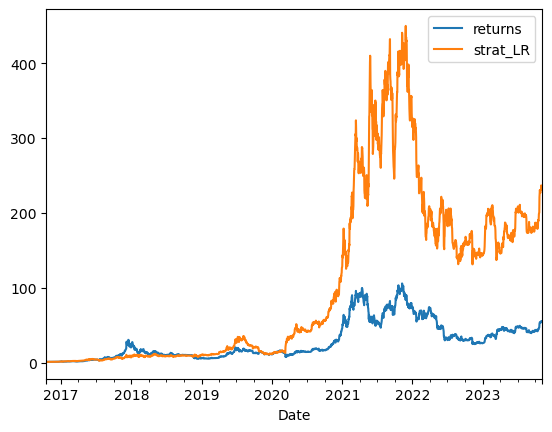

In [29]:
np.exp(df[['returns','strat_LR']].cumsum()).plot()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train,test = train_test_split(df, shuffle=False, test_size=0.3, random_state=0)

In [32]:
train = train.copy()

In [33]:
test = test.copy()

In [34]:
model = LinearRegression()

In [35]:
train

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2016-10-16,639.083008,642.898010,638.901001,641.630981,641.630981,40298100,0.004663,-0.002708,0.005625,0.000933,-0.007641,0.035046,0.002523,1,0.004663
2016-10-17,641.817993,642.328003,638.663025,639.192993,639.192993,58063600,-0.003807,0.004663,-0.002708,0.005625,0.000933,-0.007641,0.001119,1,-0.003807
2016-10-18,639.411011,640.736023,635.995972,637.960022,637.960022,65546700,-0.001931,-0.003807,0.004663,-0.002708,0.005625,0.000933,0.001783,1,-0.001931
2016-10-19,638.133972,638.874023,628.013000,630.520020,630.520020,69381696,-0.011731,-0.001931,-0.003807,0.004663,-0.002708,0.005625,0.001520,1,-0.011731
2016-10-20,630.663025,631.916992,628.257996,630.856995,630.856995,56957300,0.000534,-0.011731,-0.001931,-0.003807,0.004663,-0.002708,0.001629,1,0.000534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20,47261.406250,47328.199219,42598.914062,42843.800781,42843.800781,43909845642,-0.098108,-0.021315,0.021160,-0.010854,-0.008191,0.022755,0.003089,1,-0.098108
2021-09-21,43012.234375,43607.609375,39787.609375,40693.675781,40693.675781,48701090088,-0.051488,-0.098108,-0.021315,0.021160,-0.010854,-0.008191,0.002808,1,-0.051488
2021-09-22,40677.953125,43978.621094,40625.632812,43574.507812,43574.507812,38139709246,0.068400,-0.051488,-0.098108,-0.021315,0.021160,-0.010854,-0.000886,-1,-0.068400


In [36]:
model = LinearRegression()

In [37]:
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2021-09-25,42840.890625,42996.257812,41759.921875,42716.593750,42716.593750,31604717236,-0.002879,-0.046862,0.029856,0.068400,-0.051488,-0.098108,0.000957,1,-0.002879
2021-09-26,42721.628906,43919.300781,40848.460938,43208.539062,43208.539062,30661222077,0.011451,-0.002879,-0.046862,0.029856,0.068400,-0.051488,-0.000385,-1,-0.011451
2021-09-27,43234.183594,44313.246094,42190.632812,42235.730469,42235.730469,30980029059,-0.022772,0.011451,-0.002879,-0.046862,0.029856,0.068400,0.002859,1,-0.022772
2021-09-28,42200.898438,42775.144531,40931.664062,41034.542969,41034.542969,30214940550,-0.028852,-0.022772,0.011451,-0.002879,-0.046862,0.029856,0.002575,1,-0.028852
2021-09-29,41064.984375,42545.257812,40829.667969,41564.363281,41564.363281,30602359905,0.012829,-0.028852,-0.022772,0.011451,-0.002879,-0.046862,0.000210,1,0.012829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,34732.324219,17158456701,-0.005911,-0.014182,0.021953,0.004783,-0.001046,0.013082,0.002895,1,-0.005911
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,35082.195312,9561294264,0.010023,-0.005911,-0.014182,0.021953,0.004783,-0.001046,0.001291,1,0.010023
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996,-0.000937,0.010023,-0.005911,-0.014182,0.021953,0.004783,0.001310,1,-0.000937


In [38]:
model.fit(train[lagnames], train['returns']) 

LinearRegression()

In [39]:
test['prediction_LR'] = model.predict(test[lagnames])

In [40]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [41]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [44]:
np.exp(test[['returns','strat_LR']].sum())

returns     0.811163
strat_LR    0.727538
dtype: float64

<Axes: xlabel='Date'>

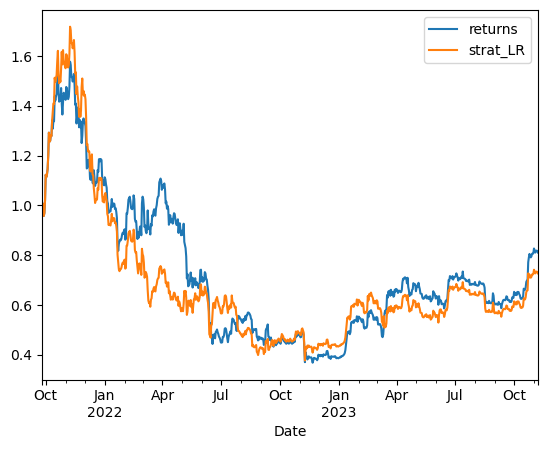

In [43]:
np.exp(test[['returns','strat_LR']].cumsum()).plot()

In [45]:
test

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2021-09-25,42840.890625,42996.257812,41759.921875,42716.593750,42716.593750,31604717236,-0.002879,-0.046862,0.029856,0.068400,-0.051488,-0.098108,0.002037,1,-0.002879
2021-09-26,42721.628906,43919.300781,40848.460938,43208.539062,43208.539062,30661222077,0.011451,-0.002879,-0.046862,0.029856,0.068400,-0.051488,0.000080,1,0.011451
2021-09-27,43234.183594,44313.246094,42190.632812,42235.730469,42235.730469,30980029059,-0.022772,0.011451,-0.002879,-0.046862,0.029856,0.068400,0.003695,1,-0.022772
2021-09-28,42200.898438,42775.144531,40931.664062,41034.542969,41034.542969,30214940550,-0.028852,-0.022772,0.011451,-0.002879,-0.046862,0.029856,0.003644,1,-0.028852
2021-09-29,41064.984375,42545.257812,40829.667969,41564.363281,41564.363281,30602359905,0.012829,-0.028852,-0.022772,0.011451,-0.002879,-0.046862,0.001164,1,0.012829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,34732.324219,17158456701,-0.005911,-0.014182,0.021953,0.004783,-0.001046,0.013082,0.003859,1,-0.005911
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,35082.195312,9561294264,0.010023,-0.005911,-0.014182,0.021953,0.004783,-0.001046,0.001950,1,0.010023
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996,-0.000937,0.010023,-0.005911,-0.014182,0.021953,0.004783,0.002014,1,-0.000937


In [46]:
(test['direction_LR'].diff() != 0).value_counts()

direction_LR
False    351
True     240
Name: count, dtype: int64